Торопкин Роман. Лаборатораня работа №1. Вариант - 4

In [157]:
import numpy as np
from scipy.optimize import linprog

Задача 1.Молочный завод выпускает молоко, кефир и сметану, расфасованные в бутылки. На производство 1 т молока, кефира и сметаны требуется соответственно 1010, 1010 и 9450 кг молока. Всего для производства продукции завод может использовать  136 000 кг молока. Затраты рабочего времени при разливе 1 т молока и кефира составляют 0,18 и 0,19 машино-часов. На расфасовке 1 т сметаны заняты специальные автоматы в течение 3,25 машино-часов. Основное оборудование может быть занято в течение 21,4 машино-часов, автоматы по расфасовке сметаны – в течение 16,25 машино-часов. Прибыль от реализации 1 т молока, кефира и сметаны соответственно равна 30, 22 и 136 ден. ед. Завод должен производить не менее 100 т молока, расфасованного в бутылки. На производство другой продукции не имеется ограничений. Требуется составить оптимальный план производства продукции.

In [158]:
c = np.array([30, 22, 136])
print(f'Коэффициенты целевой функции: {c}')

Коэффициенты целевой функции: [ 30  22 136]


In [159]:
A_ub = np.array([[1010.0, 1010.0, 9450.0], [0.18, 0.19, 0.0], [0.0, 0.0, 3.25]])
print(f'Коэффициенты условия ограничений неравенства:\n {A_ub}')

Коэффициенты условия ограничений неравенства:
 [[1.01e+03 1.01e+03 9.45e+03]
 [1.80e-01 1.90e-01 0.00e+00]
 [0.00e+00 0.00e+00 3.25e+00]]


In [160]:
b_ub = np.array([136000, 21.4, 16.25])
print(f'Коэффициенты свободных членов:\n {b_ub}')

Коэффициенты свободных членов:
 [1.360e+05 2.140e+01 1.625e+01]


In [161]:
x1_bounds = (100, None)
x2_bounds = (None, None)
x3_bounds = (None, None)
bounds = [x1_bounds, x2_bounds, x3_bounds]
print(f'Границы x: \n{bounds}')

Границы x: 
[(100, None), (None, None), (None, None)]


Функция linprog находит минимальное решение. Для того, чтобы найти максимальное, необходимо коэфициенты записать с противоположным знаком и итоговую функцию умножить на -1 

In [162]:
res = linprog(c=-c, A_ub = A_ub, b_ub = b_ub, bounds=bounds, options={"disp": True})
print(f'Максимальное значение x: \n{res.x};\nоптимальное решение: {-1 * res.fun}')

Optimization failed. The problem appears to be unbounded.
         Iterations: 3
Максимальное значение x: 
[118.88888889   0.           1.68489124];
оптимальное решение: 3795.8118753674307


Построение графика

In [165]:
import matplotlib.pyplot as plt
L1 = lambda x: 3 - 2/3 * x
L2 = lambda x: 13/2 - (3/2) * x
L3 = lambda x: -1 + x

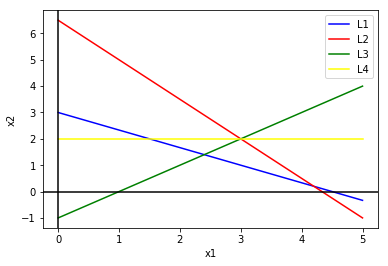

In [168]:
x1 = np.linspace(0,5,100)
y1 = L1(x1)
y2 = L2(x1)
y3 = L3(x1)
y4 = np.full((100), 2)

fig, ax = plt.subplots()                        
ax.plot(x1, y1, color="blue", label="L1")    
ax.plot(x1, y2, color="red", label="L2")  
ax.plot(x1, y3, color="green", label="L3")
ax.plot(x1, y4, color="yellow", label="L4")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.legend()
plt.show()      